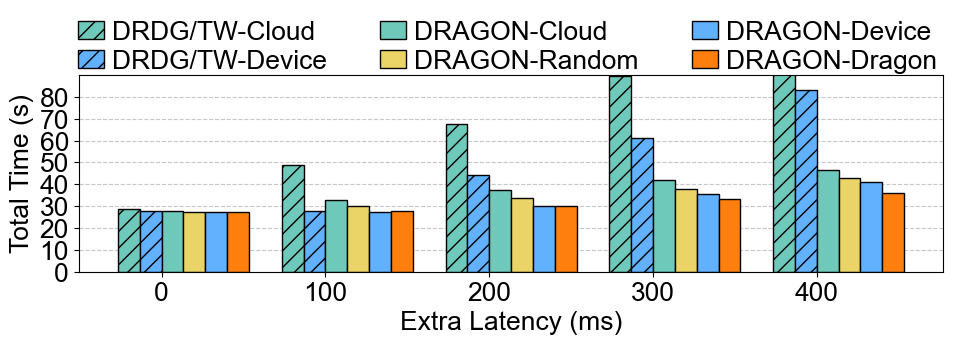

In [2]:
import json
import plt_utils
import matplotlib.pyplot as plt
import numpy as np

with open("../scheduling_stats.json") as f:
    results = json.load(f)

font = plt_utils.Font("arial", size=19)
baselines = [
    'synchronized-cloud',
    'synchronized-device',
    'speculative-cloud',
    'speculative-random',
    'speculative-device',
    'speculative-dragon',
]
colors = {
    'cloud': '#6FC9BB', 
    'device': '#61B1FF', 
    'random': '#EAD367', 
    'dragon': '#ff7f0e', 
}
plt.figure(figsize=(10, 4), dpi=100)
x_axis = np.arange(len(results))
bar_width = (1 - 0.2) / len(baselines)
y_max = 0
x_labels = []
for i, group in enumerate(results):
    for j, baseline in enumerate(baselines):
        data = np.mean(group[baseline])
        y_max = max(y_max, data)
        scheduling_strategy = baseline.split('-')[-1]
        if baseline.startswith("spec"):
            label = f"DRAGON-{scheduling_strategy.capitalize()}"
        else:
            label = f"DRDG/TW-{scheduling_strategy.capitalize()}"
        kwargs = dict(
            zorder=2, 
            label=label, 
            color=colors[scheduling_strategy], 
            edgecolor='black'
        )
        if baseline.startswith('synchronized'):
            kwargs.update({'hatch': "//"})
        plt.bar(x_axis[i] + j * bar_width, data, width=bar_width, **kwargs)
    x_labels.append(int(group["latency"][0] * 1000))

plt.ylim(0, 90)
plt.yticks(np.arange(0, plt.ylim()[1], 10), fontproperties=font)
plt.xlabel('Extra Latency (ms)', fontproperties=font)
plt.ylabel('Total Time (s)', fontproperties=font)
plt.xticks(x_axis + 0.2, x_labels, fontproperties=font)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop=font, loc='upper right',
           bbox_to_anchor=(1.02, 1.4),
        ncol=3, labelspacing=0.2, columnspacing=2, 
        frameon=False, handlelength=1, handletextpad=0.3)
plt.tight_layout()
plt.savefig("figures/scheduling.pdf", bbox_inches='tight')
plt.show()

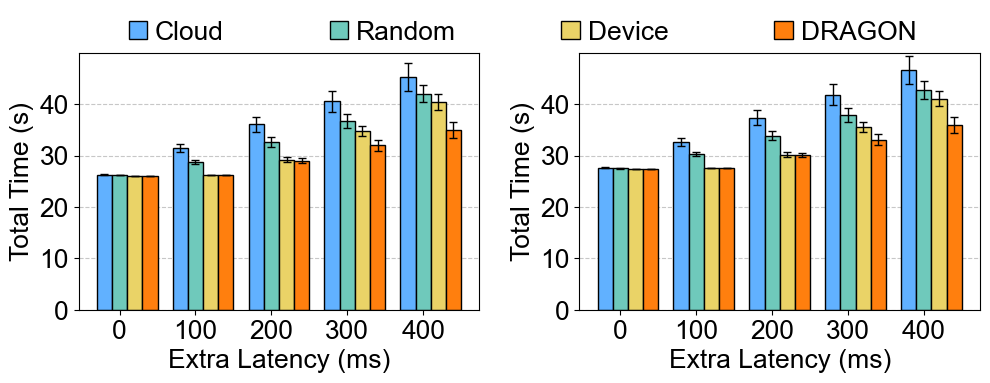

In [14]:
import json
import plt_utils
import matplotlib.pyplot as plt
import numpy as np

with open("../scheduling_stats.json") as f:
    results_opt = json.load(f)

with open("../outputs/Scheduling-20250330150714/stats.json") as f:
    results_qwen = json.load(f)

font = plt_utils.Font("arial", size=19)
baselines = [
    # 'synchronized-cloud',
    # 'synchronized-device',
    'speculative-cloud',
    'speculative-random',
    'speculative-device',
    'speculative-dragon',
]
colors = {
    'cloud': '#61B1FF', 
    'device': '#EAD367', 
    'random': '#6FC9BB', 
    'dragon': '#ff7f0e', 
}
plt.figure(figsize=(10, 3.5), dpi=100)
x_axis = np.arange(len(results))
bar_width = (1 - 0.2) / len(baselines)

for k, results in enumerate([results_qwen, results_opt]):
    plt.subplot(1, 2, k + 1)
    y_max = 0
    x_labels = []
    for i, group in enumerate(results):
        for j, baseline in enumerate(baselines):
            data = np.mean(group[baseline])
            stderr = np.std(group[baseline]) / np.sqrt(len(group[baseline]))
            y_max = max(y_max, data)
            strategy = baseline.split('-')[-1]
            kwargs = dict(
                zorder=2, label=strategy.upper() if baseline.endswith('dragon') else strategy.capitalize(), 
                color=colors[strategy], 
                edgecolor='black'
            )
            plt.bar(x_axis[i] + j * bar_width, data, width=bar_width, **kwargs)
            plt.errorbar(x_axis[i] + j * bar_width, data, yerr=stderr, fmt='-', color='k', capsize=3, lw=1)
        x_labels.append(int(group["latency"][0] * 1000))

    plt.ylim(0, 50)
    plt.yticks(np.arange(0, plt.ylim()[1], 10), fontproperties=font)
    plt.xlabel('Extra Latency (ms)', fontproperties=font)
    plt.ylabel('Total Time (s)', fontproperties=font)
    plt.xticks(x_axis + 0.2, x_labels, fontproperties=font)
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
    plt.tight_layout()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(), by_label.keys(), 
    prop=font, loc='upper right',
    bbox_to_anchor=(0.9, 1.22),
    ncol=4, labelspacing=0.2, columnspacing=4, 
    frameon=False, handlelength=0.7, handletextpad=0.3
)
plt.subplots_adjust(wspace=0.25)
plt.savefig("figures/scheduling.pdf", bbox_inches='tight')
plt.show()